In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv


In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import squarify

In [3]:
df=pd.read_csv("/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv")
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [4]:
def clean_assets(x):
    if type(x)==float:
        return x
    else:
        x=[y for y in x.split('\n')[0][3:]]
        while ',' in x:
            x.remove(',')
        try:
            return int(''.join(x))
        except ValueError:
            return 0
def clean_criminalcases(x):
    if x=='Not Available' or type(x)==float:
        return np.nan
    return int(x)
df['CRIMINAL\nCASES']=df['CRIMINAL\nCASES'].apply(lambda x: clean_criminalcases(x))
df['ASSETS']=df['ASSETS'].apply(lambda x:clean_assets(x))
df['LIABILITIES']=df['LIABILITIES'].apply(lambda x:clean_assets(x))

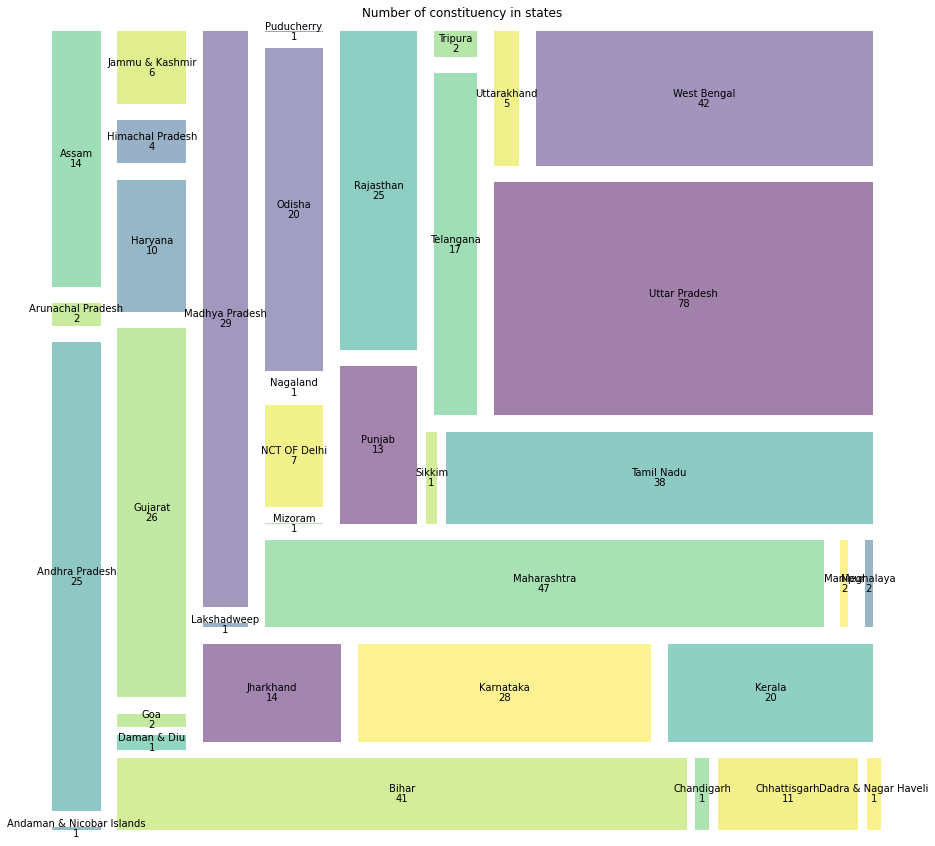

In [5]:
temp=df[df['WINNER']==1]
n_const=temp.groupby('STATE')['NAME'].agg('count').reset_index()
n_const.columns=['STATE','COUNT']
fig=plt.figure(figsize=(15,15))
squarify.plot(sizes=n_const['COUNT'],label=n_const['STATE'],alpha=0.5,value=n_const['COUNT'],pad=True)
plt.axis('off')
plt.title('Number of constituency in states')
plt.show()

**Larger the area of the state in the above treemap the more important the state is to win.**

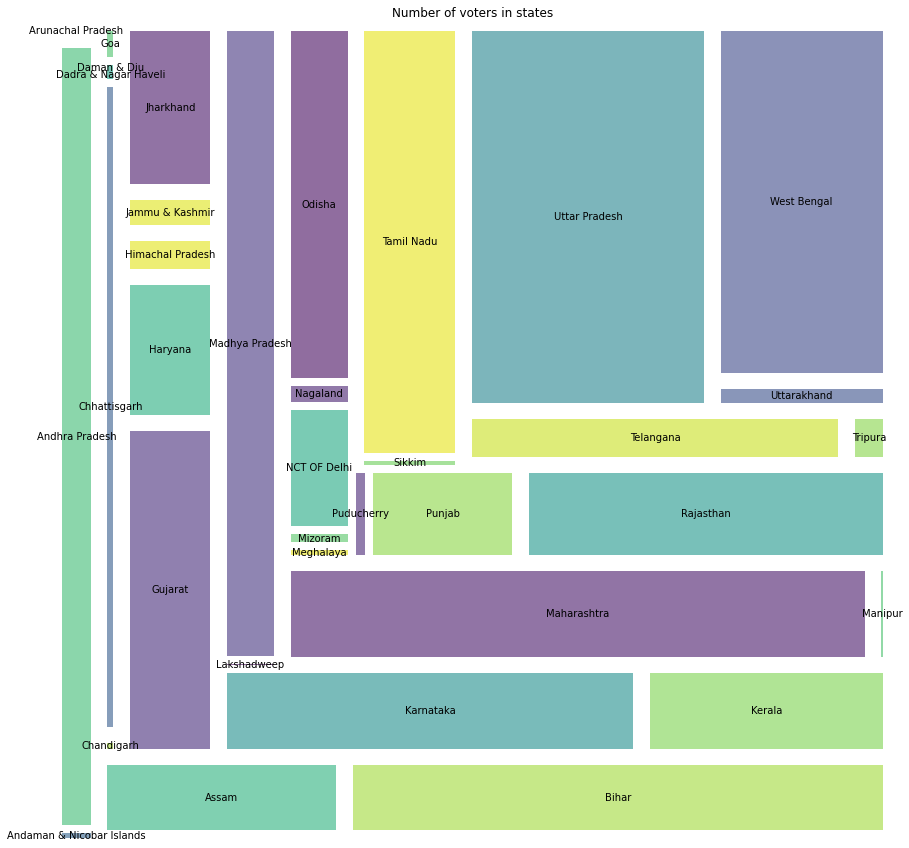

In [6]:
temp=df.copy()
n_const=temp.groupby('STATE')['TOTAL\nVOTES'].agg('sum').reset_index()
n_const.columns=['STATE','TOTAL VOTERS IN STATE']
fig=plt.figure(figsize=(15,15))
squarify.plot(sizes=n_const['TOTAL VOTERS IN STATE'],label=n_const['STATE'],alpha=0.6,pad=True)
plt.axis('off')
plt.title('Number of voters in states')
plt.show()

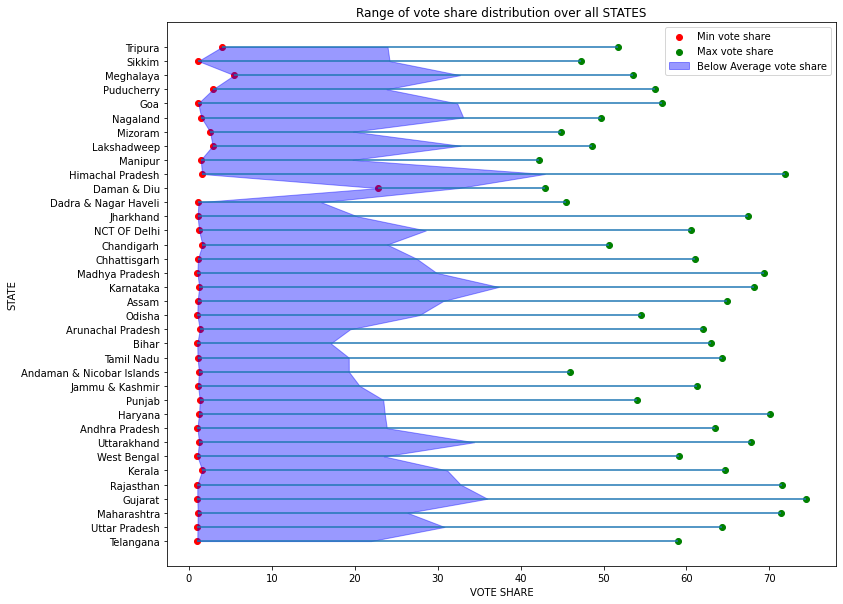

In [7]:
const=df['STATE'].unique()
temp=df.copy()
temp=temp[temp['PARTY']!='NOTA']
voteshare_dict={}
for x,y in temp.iterrows():
    if y['STATE'] in voteshare_dict.keys():
        voteshare_dict[y['STATE']].append(y['OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'])
    else:
        voteshare_dict[y['STATE']]=[y['OVER TOTAL VOTES POLLED \nIN CONSTITUENCY']]

min_vals=[]
max_vals=[]
avg_vals=[]
for x,y in voteshare_dict.items():
    min_vals.append(min(y))
    max_vals.append(max(y))
    avg_vals.append(np.mean(y))
y=[x for x in range(1,len(voteshare_dict)+1)]
fig=plt.figure(figsize=(12,10))
plt.hlines(y=y,xmin=min_vals,xmax=max_vals)
plt.scatter(x=min_vals,y=y,color='r',label='Min vote share')
plt.scatter(x=max_vals,y=y,color='g',label='Max vote share')
plt.fill_betweenx(y=y,x1=min_vals,x2=avg_vals,color='b',label='Below Average vote share',alpha=0.4)
plt.yticks(ticks=y,labels=voteshare_dict.keys())
plt.title('Range of vote share distribution over all STATES')
plt.xlabel('VOTE SHARE')
plt.ylabel("STATE")
plt.legend()
plt.show()

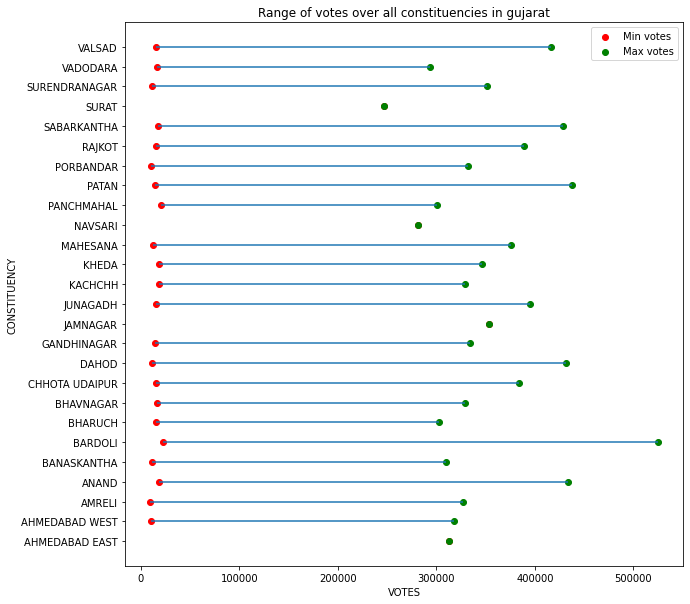

In [8]:
guj=df[df['STATE']=='Gujarat']
const=guj['CONSTITUENCY'].unique()
voteshare_dict={}
for x,y in guj.iterrows():
    if y['CONSTITUENCY'] in voteshare_dict.keys():
        voteshare_dict[y['CONSTITUENCY']].append(y['GENERAL\nVOTES'])
    else:
        voteshare_dict[y['CONSTITUENCY']]=[]
min_vals=[]
max_vals=[]
for x,y in voteshare_dict.items():
    min_vals.append(min(y))
    max_vals.append(max(y))
y=[x for x in range(1,len(voteshare_dict)+1)]
fig=plt.figure(figsize=(10,10))
plt.hlines(y=y,xmin=min_vals,xmax=max_vals)
plt.scatter(x=min_vals,y=y,color='r',label='Min votes')
plt.scatter(x=max_vals,y=y,color='g',label='Max votes')
plt.yticks(ticks=y,labels=voteshare_dict.keys())
plt.title('Range of votes over all constituencies in gujarat')
plt.xlabel('VOTES')
plt.legend()
plt.ylabel("CONSTITUENCY")
plt.show()

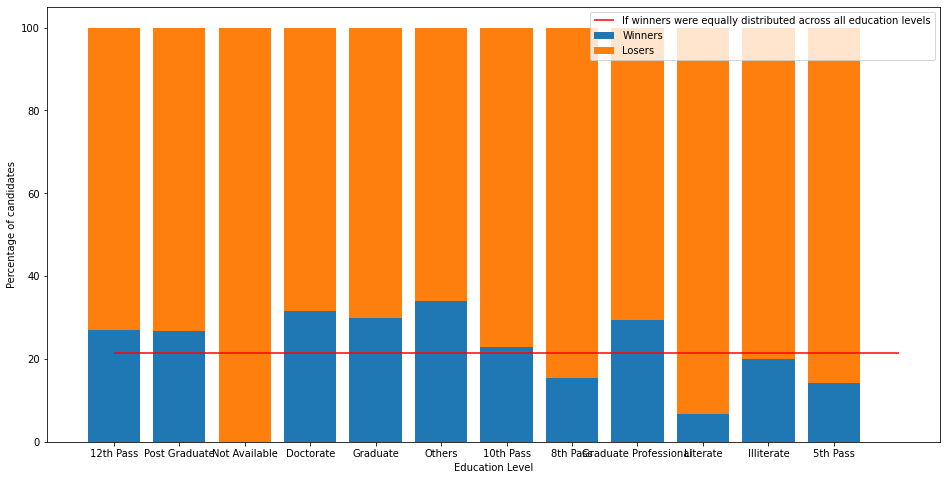

In [9]:
edu_dict={}
df['EDUCATION'].replace({np.nan:'Not Available'},inplace=True)
df['EDUCATION']=df['EDUCATION'].apply(lambda x:x.strip())
temp=pd.DataFrame({'EDU':df['EDUCATION'].unique()})
temp.set_index('EDU',inplace=True)
temp['WINNERS']=np.zeros(12)
temp['LOSERS']=np.zeros(12)
for x,y in df.iterrows():
    if y['WINNER']==1:
        temp.at[y['EDUCATION'],'WINNERS']= temp.loc[y['EDUCATION']]['WINNERS']+1
    elif y['WINNER']==0:
        temp.at[y['EDUCATION'],'LOSERS']= temp.loc[y['EDUCATION']]['LOSERS']+1
temp['% WINNERS']=temp['WINNERS']*100/(temp['WINNERS']+temp['LOSERS'])
temp['% LOSERS']=100-temp['% WINNERS']
fig,ax=plt.subplots(figsize=(16,8))
ax.bar(temp.index,temp['% WINNERS'],label='Winners')
ax.bar(temp.index,temp['% LOSERS'],bottom=temp['% WINNERS'],label='Losers')
plt.xlabel('Education Level')
plt.ylabel('Percentage of candidates')
plt.hlines(y=np.mean(temp['% WINNERS']),xmin=0,xmax=12,color='r',label='If winners were equally distributed across all education levels')
plt.legend()
fig.show()

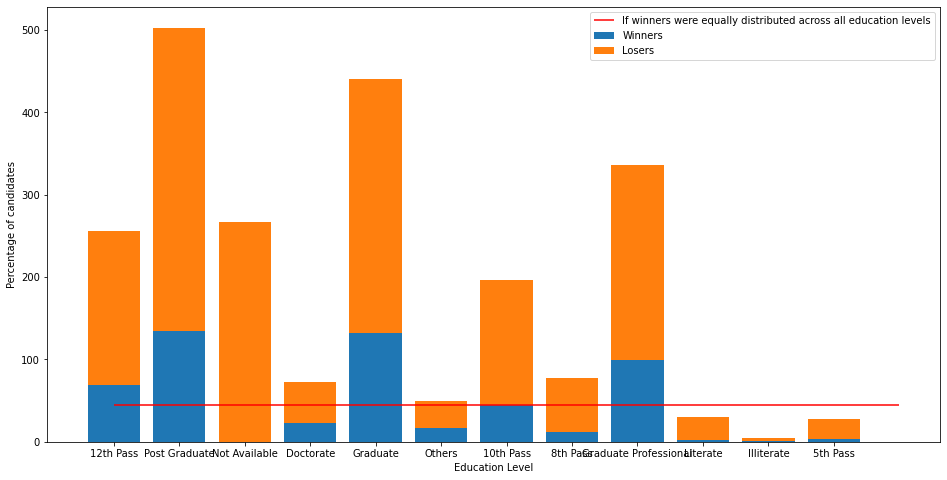

In [10]:
fig,ax=plt.subplots(figsize=(16,8))
ax.bar(temp.index,temp['WINNERS'],label='Winners')
ax.bar(temp.index,temp['LOSERS'],bottom=temp['WINNERS'],label='Losers')
plt.xlabel('Education Level')
plt.ylabel('Percentage of candidates')
plt.hlines(y=np.mean(temp['WINNERS']),xmin=0,xmax=12,color='r',label='If winners were equally distributed across all education levels')
plt.legend()
fig.show()

There are 2 major political parties in India,
1. BJP - Bhartiya Janta Party
2. Indian National Congress

Hence let's take a closer look at just these to parties.

In [11]:
df=df[df['PARTY'].isin(['BJP','INC'])]

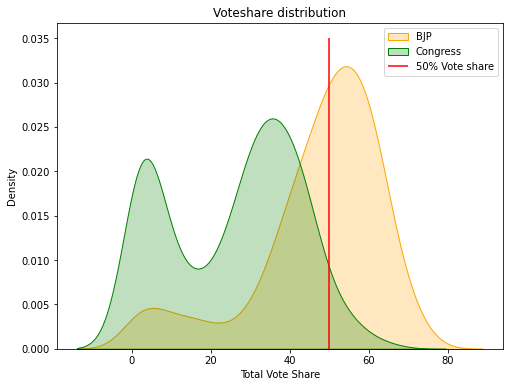

In [12]:
bjp=df[df['PARTY']=='BJP']
cong=df[df['PARTY']=='INC']
fig=plt.figure(figsize=(8,6))
sns.kdeplot(bjp['OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'],color='orange',label='BJP',shade=True)
sns.kdeplot(cong['OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'],color='green',label='Congress',shade=True)
plt.xlabel('Total Vote Share')
plt.vlines(x=50,ymin=0,ymax=0.035,color='r',label='50% Vote share')
plt.legend()
plt.title("Voteshare distribution")
plt.show()

BJP clearly looks to have obtained more voteshare in many constituencies as compared to INC.

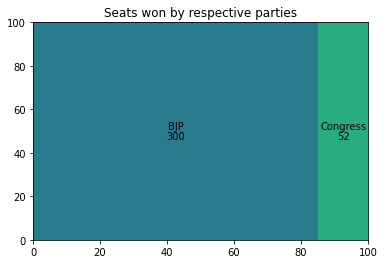

In [13]:
wins=[np.sum(bjp['WINNER']),np.sum(cong['WINNER'])]
squarify.plot(sizes=wins,label=['BJP','Congress'],value=wins)
plt.title('Seats won by respective parties')
plt.show()

A majority has been formed by the BJP as they have won more than 80% of the constituencies.

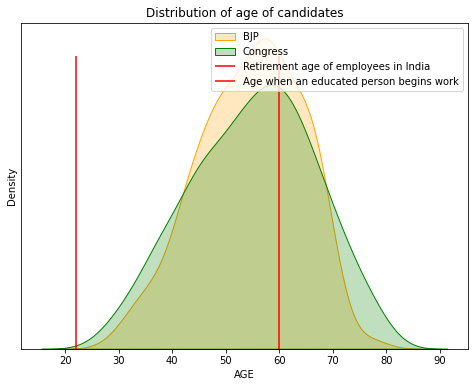

In [14]:
bjp=df[df['PARTY']=='BJP']
cong=df[df['PARTY']=='INC']
fig=plt.figure(figsize=(8,6))
sns.kdeplot(bjp['AGE'],color='orange',label='BJP',shade=True)
sns.kdeplot(cong['AGE'],color='green',label='Congress',shade=True)
plt.xlabel('AGE')
plt.vlines(x=60,ymin=0,ymax=0.035,color='r',label='Retirement age of employees in India')
plt.vlines(x=22,ymin=0,ymax=0.035,color='r',label='Age when an educated person begins work')
plt.legend()
plt.yticks([])
plt.title("Distribution of age of candidates")
plt.show()

As we can see that the graph is higly skewed towards the right. Most people are older than the retirement age.

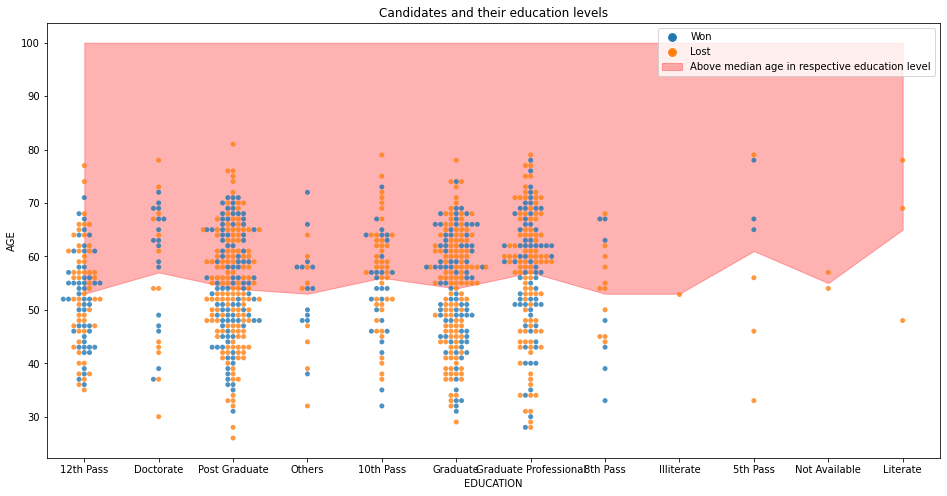

In [15]:
fig=plt.figure(figsize=(16,8))
temp=df.copy()
temp['WINNER'].replace({1:'Won',0:'Lost'},inplace=True)
sns.swarmplot(data=temp,x='EDUCATION',y='AGE',hue='WINNER',alpha=0.8)
plt.fill_between(x=[x for x in range(12)],y1=[53,57,54,53,56,54,57,53,53,61,55,65],y2=[100 for x in range(12)],label='Above median age in respective education level',color='r',alpha=0.3)
plt.legend()
plt.title("Candidates and their education levels")
fig.show()

# **More to Come! Stay tuned**